##  Importing Tools For Machine Learning

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

## Reading and Analysing data given

In [3]:
data = pd.read_csv('iitm_intern_train_data.csv')

In [4]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,39,40,41,42,43,44,45,46,47,class
0,-0.000018,0.000043,0.000033,0.000008,0.000018,0.000168,-0.037158,-0.037202,-0.037235,-0.010982,...,-0.67649,0.96055,8.6993,-1.5021,-1.5021,-1.5017,-1.4932,-1.4933,-1.4934,10
1,-0.000001,-0.000017,-0.000091,-0.000002,-0.000005,0.000030,0.003444,0.003460,0.003551,-0.044235,...,-0.76999,6.98720,3.7207,-1.5000,-1.5000,-1.5001,-1.4996,-1.4996,-1.4996,9
2,-0.000008,0.000022,0.000273,-0.000013,0.000045,0.000235,-0.031176,-0.031198,-0.031471,-0.005473,...,-0.50284,2.72700,3.6334,-1.5067,-1.5067,-1.5068,-1.4977,-1.4978,-1.4978,10
3,-0.000003,-0.000024,-0.000068,-0.000004,-0.000014,0.000208,0.011901,0.011925,0.011993,-0.010714,...,-0.82455,5.36100,11.3180,-1.4998,-1.4998,-1.4998,-1.5001,-1.5002,-1.5000,9
4,0.000001,-0.000046,-0.000155,-0.000005,-0.000003,-0.000062,0.002543,0.002589,0.002744,-0.037649,...,-0.70297,1.80770,2.5276,-1.5059,-1.5058,-1.5055,-1.4992,-1.4992,-1.4992,9


In [5]:
data.shape

(46807, 49)

In [6]:
data.describe

<bound method NDFrame.describe of                   0             1         2             3         4         5  \
0     -1.793200e-05  4.344000e-05  0.000033  7.981800e-06  0.000018  0.000168   
1     -1.313700e-06 -1.688500e-05 -0.000091 -1.996100e-06 -0.000005  0.000030   
2     -8.278900e-06  2.167200e-05  0.000273 -1.345900e-05  0.000045  0.000235   
3     -2.935600e-06 -2.423100e-05 -0.000068 -3.866000e-06 -0.000014  0.000208   
4      1.103600e-06 -4.558900e-05 -0.000155 -4.815800e-06 -0.000003 -0.000062   
...             ...           ...       ...           ...       ...       ...   
46802 -3.652300e-06  2.496900e-05  0.000024 -4.599600e-07  0.000067 -0.000282   
46803 -1.795000e-06  1.683800e-07 -0.000004 -1.393700e-06  0.000005  0.000052   
46804 -4.947600e-06 -8.041000e-06  0.000253  1.988500e-05  0.000145 -0.000119   
46805 -4.897500e-06 -1.940900e-05 -0.000064 -1.463800e-06 -0.000007 -0.000126   
46806 -2.709400e-07  7.570700e-06 -0.000060 -1.164700e-07  0.000013 -0.0000

In [69]:
data.isnull().sum()

0        0
1        0
2        0
3        0
4        0
5        0
6        0
7        0
8        0
9        0
10       0
11       0
12       0
13       0
14       0
15       0
16       0
17       0
18       0
19       0
20       0
21       0
22       0
23       0
24       0
25       0
26       0
27       0
28       0
29       0
30       0
31       0
32       0
33       0
34       0
35       0
36       0
37       0
38       0
39       0
40       0
41       0
42       0
43       0
44       0
45       0
46       0
47       0
class    0
dtype: int64

#####  no need of imputing data, as no values are missing

## Trying to find correlation between label 

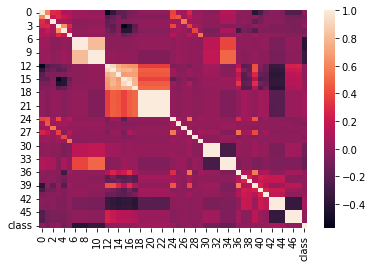

In [8]:
corr = data.corr()
sns.heatmap(corr);

## Separting data into features and label

In [9]:
X = data.drop(['class'], axis = 1)
Y = data['class']

In [10]:
X.head()

,0,1,2,3,4,5,6,7,8,9,...,38,39,40,41,42,43,44,45,46,47
0,-0.000018,0.000043,0.000033,0.000008,0.000018,0.000168,-0.037158,-0.037202,-0.037235,-0.010982,...,8.7709,-0.67649,0.96055,8.6993,-1.5021,-1.5021,-1.5017,-1.4932,-1.4933,-1.4934
1,-0.000001,-0.000017,-0.000091,-0.000002,-0.000005,0.000030,0.003444,0.003460,0.003551,-0.044235,...,16.1250,-0.76999,6.98720,3.7207,-1.5000,-1.5000,-1.5001,-1.4996,-1.4996,-1.4996
2,-0.000008,0.000022,0.000273,-0.000013,0.000045,0.000235,-0.031176,-0.031198,-0.031471,-0.005473,...,4.3485,-0.50284,2.72700,3.6334,-1.5067,-1.5067,-1.5068,-1.4977,-1.4978,-1.4978
3,-0.000003,-0.000024,-0.000068,-0.000004,-0.000014,0.000208,0.011901,0.011925,0.011993,-0.010714,...,5.5151,-0.82455,5.36100,11.3180,-1.4998,-1.4998,-1.4998,-1.5001,-1.5002,-1.5000
4,0.000001,-0.000046,-0.000155,-0.000005,-0.000003,-0.000062,0.002543,0.002589,0.002744,-0.037649,...,3.1774,-0.70297,1.80770,2.5276,-1.5059,-1.5058,-1.5055,-1.4992,-1.4992,-1.4992


In [11]:
Y.head()

0    10
1     9
2    10
3     9
4     9
Name: class, dtype: int64

##### dropping last column from data frame and putting in X , Last column dropped into Y

In [12]:

Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.2, random_state = 5)

In [13]:
Xtrain.head()

,0,1,2,3,4,5,6,7,8,9,...,38,39,40,41,42,43,44,45,46,47
19161,-0.000008,6.660900e-06,9.127400e-06,0.000002,8.506000e-06,-0.000084,0.045121,0.045114,0.045105,0.106510,...,6.8445,-0.76269,21.3760,3.9331,-1.5015,-1.5015,-1.5015,-1.5001,-1.5001,-1.5001
8114,0.000001,4.084300e-07,-3.983700e-06,-0.000002,1.243600e-06,0.000005,0.020597,0.020596,0.020600,-0.030995,...,8.7503,-0.63151,3.0004,3.3141,-1.4960,-1.4960,-1.4959,-1.4993,-1.4993,-1.4993
30917,-0.000008,-2.521000e-06,-5.463000e-06,-0.000015,-7.336800e-07,0.000005,-0.023707,-0.023705,-0.023699,-0.033661,...,7.0206,-0.71150,17.8930,14.1300,-1.4978,-1.4978,-1.4978,-1.5020,-1.5020,-1.5021
7586,-0.000002,7.689600e-06,-8.442600e-07,-0.000003,-8.639800e-06,0.000012,0.056360,0.056352,0.056353,0.109730,...,19.4330,-0.47492,5.5390,10.2710,-1.4996,-1.4996,-1.4996,-1.4983,-1.4983,-1.4984
22358,-0.000001,4.869800e-06,8.982400e-06,-0.000002,6.850000e-06,0.000021,0.021431,0.021426,0.021417,-0.035590,...,17.2060,-0.49483,2.8490,10.7210,-1.4996,-1.4996,-1.4996,-1.4989,-1.4989,-1.4989


In [14]:
Ytrain = [i -1 for i in Ytrain]

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [17]:
rf_model = RandomForestClassifier()

In [18]:
rf_model.fit(Xtrain,Ytrain)

RandomForestClassifier()

In [19]:
rf_model.score(Xtrain,Ytrain)

1.0

In [20]:
ytrainpred = rf_model.predict(Xtrain)

In [21]:
accuracy_score(Ytrain,ytrainpred)

1.0

In [22]:
ytest1 = rf_model.predict(Xtest)

In [23]:
ytest1 = [i +1 for i in ytest1]

In [24]:
accuracy_score(Ytest,ytest1)

0.9979705191198461

## As already data fits perfectly, No need for hypertuning parameter 

In [25]:
Xtest = pd.read_csv('iitm_intern_test_data.csv')

In [26]:
ytestpred = rf_model.predict(Xtest)

In [27]:
ytestpred = [i+1 for i in ytestpred]

In [28]:
ytestpred = pd.DataFrame(ytestpred)

In [29]:
ytestpred.head()

,0
0,1
1,5
2,5
3,11
4,7


In [30]:
ytestpred.to_csv('CH20B013_AnkitKumar_predictions.csv',index = False)